In [33]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [34]:
Animal_ID = ['EJT76','EJT83','EJT84','EJT93','EJT95','EJT89','EJT90','EJT91','EJT92','EJT94']

baseline_mice = ['EJT76','EJT83','EJT84']

DMS_pre_lesion = ['EJT79','EJT93','EJT95']   

DLS_pre_lesion = ['EJT91','EJT78', 'EJT89']


InputPath = ('D:\Behavioural_data_output\\')

OutputPath = ('D:\Behavioural_data_output\\')

In [35]:
import scipy.io
import os, importlib
import matplotlib.pyplot as plt
import statistics
import scipy.stats
import numpy as np
import pandas as pd
from ast import literal_eval
import pickle
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
import ptitprince as pt


In [36]:
def conactinate_nth_items(startlist):
    concatinated_column_vectors = []
    for c in range(len(max(startlist, key=len))):
        column = []
        for t in range(len(startlist)):
            if c <= len(startlist[t])-1:
                column = column + [startlist[t][c]]
        concatinated_column_vectors.append(column)
    return concatinated_column_vectors

def convolve_movmean(y,N):
    y_padded = np.pad(y, (N//2, N-1-N//2), mode='edge')
    y_smooth = np.convolve(y_padded, np.ones((N,))/N, mode='valid') 
    return y_smooth

def plot_across_animals(data,xlabel,ylabel,Animal_ID,windowsize):

    fig,ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.set_ylim([0, 1])
    for animals in range(len(Animal_ID)):
        ax.plot(data[animals][0:int(len(data[animals])*0.8)], color = 'grey',alpha = 0.5) ## only plot 90% of the data to avoid end of last session dip dominating the moving average. 

    cc_vecs = conactinate_nth_items(data)   
    medianPPerfs = [] 
    for item in cc_vecs:
        medianPPerfs = medianPPerfs + [np.median(item)]
    covlved_medianPPerfs = convolve_movmean(medianPPerfs,windowsize)

    ax.plot(covlved_medianPPerfs[0:int(len(covlved_medianPPerfs)*0.8)], color = 'firebrick')  

    patch1 = mpatches.Patch(color='grey', label=('n = ' + str(len(Animal_ID))))
    plt.legend(handles=[patch1])

    ax.set_xlabel(xlabel,fontsize = 20)
    ax.set_ylabel(ylabel,fontsize = 20)
    
    ax.set_xlim(0,8000)

def SaveFig(file_name,figure_dir):
    if not os.path.isdir(figure_dir):
        os.makedirs(figure_dir)
    plt.savefig(figure_dir + file_name, bbox_inches='tight')
    plt.close()

In [37]:
#Define list
AA_TrialsToFullTask = []
AA_PerfectScores = []
AA_TrialsPerSessions = []

#Trials to full session, pull data out of animal ID, looping around each animal ID to pull out perfect score trials, trials per session, trials to full task 
for Animal_index, CurrentAnimal in enumerate(Animal_ID):

    InputPathCurrent = (InputPath + CurrentAnimal+'\\AcrossSessions\\AnalysisOutput\\')
    
    with open (InputPathCurrent + 'PerfectScore_trials' , 'rb') as fp:
        PerfectCount = pickle.load(fp)        
    AA_PerfectScores = AA_PerfectScores + [PerfectCount]
    
    with open (InputPathCurrent + 'TrialsPerSessions' , 'rb') as fp:
        TrialsPerSessions = pickle.load(fp)        
    AA_TrialsPerSessions = AA_TrialsPerSessions + [TrialsPerSessions]#
    
    with open (InputPathCurrent + 'Trials_to_Full_Task' , 'rb') as fp:
        TrialsToFullTask = pickle.load(fp)        
    AA_TrialsToFullTask = AA_TrialsToFullTask + [TrialsToFullTask]#

In [38]:
group = []
for index,animal in enumerate(Animal_ID):
    if animal in baseline_mice:
        group = group + ['Baseline']
    if animal in DMS_pre_lesion:
        group = group + ['DMS_pre_lesion']
    if animal in DLS_pre_lesion:
        group = group + ['DLS_pre_lesion']

In [39]:
group

['Baseline',
 'Baseline',
 'Baseline',
 'DMS_pre_lesion',
 'DMS_pre_lesion',
 'DLS_pre_lesion',
 'DLS_pre_lesion']

In [40]:
TTF_compare_df = pd.DataFrame(
    {'trials_to_full': AA_TrialsToFullTask,
     'Group': group,
     'Animal': Animal_ID
     })

ValueError: arrays must all be same length

In [41]:
TTF_compare_df

trials_to_full           Group Animal
0            2956        Baseline  EJT76
1            1918        Baseline  EJT83
2            2428        Baseline  EJT84
3            2148  DMS_pre_lesion  EJT93
4            2743  DMS_pre_lesion  EJT95
5           10088  DLS_pre_lesion  EJT89
6            6210  DLS_pre_lesion  EJT90
7            2358  DLS_pre_lesion  EJT91
8            2358  DLS_pre_lesion  EJT92
9            6210  DLS_pre_lesion  EJT94

<AxesSubplot:xlabel='trials_to_full', ylabel='Group'>

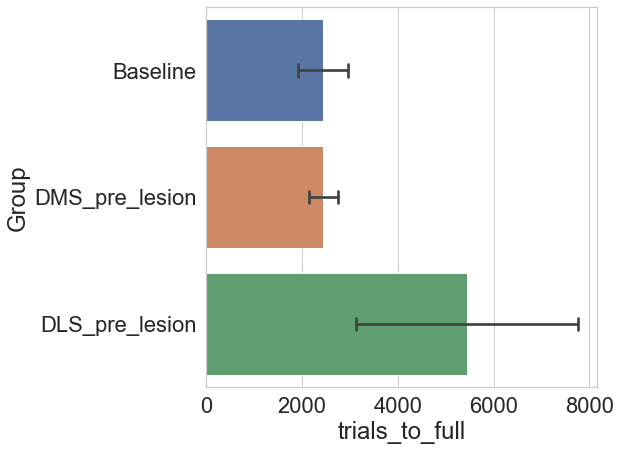

In [42]:
f, ax = plt.subplots(figsize=(7, 7))

#sns.barplot(y = "trials_to_full", x = "Group", data = Trials_df, capsize = .1)

sns.barplot(y = "Group", x = "trials_to_full", data = TTF_compare_df, capsize = .1)

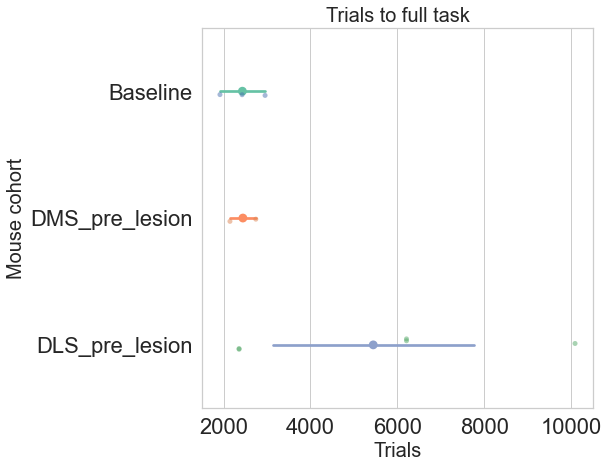

In [47]:
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.pointplot(x="trials_to_full", y="Group", data=TTF_compare_df, join=False, palette="Set2")

ax = sns.stripplot(x="trials_to_full", y="Group", data=TTF_compare_df, jitter=0.05, dodge=True, size=5, alpha=.5 )

ax.set_title('Trials to full task',fontsize = 20)
ax.set_xlabel('Trials',fontsize = 20)
ax.set_ylabel('Mouse cohort',fontsize = 20)

plt.savefig('D:\Behavioural_data_output\AcrossAnimals\prelesionTTFT.png')